## Task 18: Supervised Learning - Simple Linear Regression

### Practical Task 1

#### 1.1. Importing the data

In [64]:
# Import the needed libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [65]:
# Import the .CSV
insurance_df = pd.read_csv("insurance.csv", delimiter=",")
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [66]:
# Understanding the data format
insurance_df.shape
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [67]:
# Checking the Data types
insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [17]:
# Checking for null values
nan_count = insurance_df.isna().sum()
print(nan_count)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


#### 1.2. Creating the Regression Dataset

In [85]:
regression_df = insurance_df[["age", "charges"]]
regression_df

,age,charges
0,19,16884.92400
1,18,1725.55230
2,28,4449.46200
3,33,21984.47061
4,32,3866.85520
...,...,...
1333,50,10600.54830
1334,18,2205.98080
1335,18,1629.83350
1336,21,2007.94500


Text(0, 0.5, 'Insurance Charges (units)')

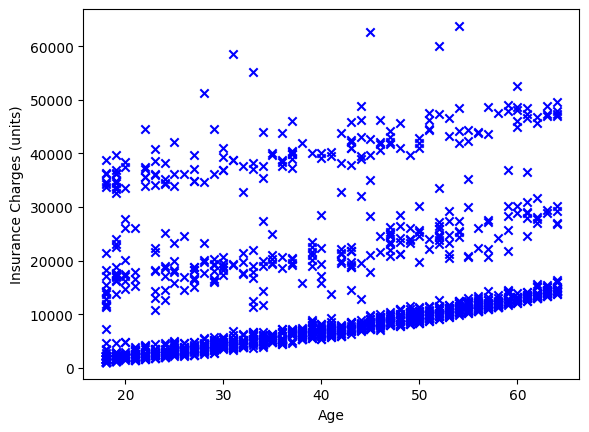

In [86]:
x = regression_df.iloc[:, :1].values
y = regression_df.iloc[:, -1].values

plt.scatter(x,y, color = "blue", marker = "x")
plt.xlabel("Age")
plt.ylabel("Insurance Charges (units)")

From this scatter plot, it appears that insurance charges increase as age increases (postitive correlation), although there are seem to be other factors resulting in high insurance charges too

#### 1.3. Running the Regression

In [87]:
insurance_model = LinearRegression()
insurance_model.fit(x,y)

LinearRegression()

#### 1.4. Visualising Line of Best Fit

Text(0, 0.5, 'Insurance Charges')

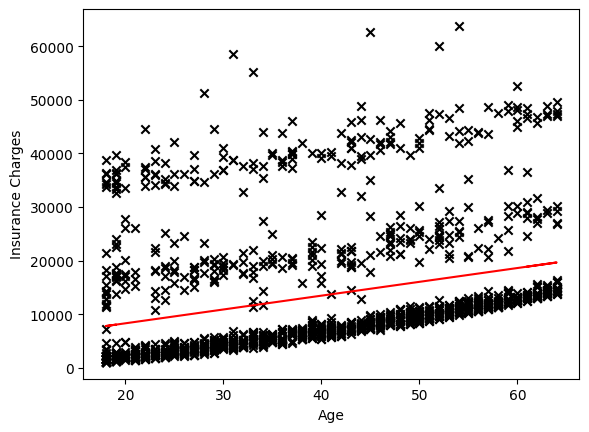

In [88]:
# Plotting the line of best fit
y_pred = insurance_model.predict(x)

plt.scatter(x,y, color = "black", marker = "x")
plt.plot(x, y_pred, color = "red")
plt.xlabel("Age")
plt.ylabel("Insurance Charges")

#### 1.5. Predictions

In [89]:
# What is the predicted insurance charges of a person of 40?

unk_x_1 = [[40]]

answer_1 = insurance_model.predict(unk_x_1).round(2)
print(f"A 40-year old would have a predicted insurance charge of {answer_1} units")

A 40-year old would have a predicted insurance charge of [13474.79] units


A 70-year old would have a predicted insurance charge of [21206.47] units


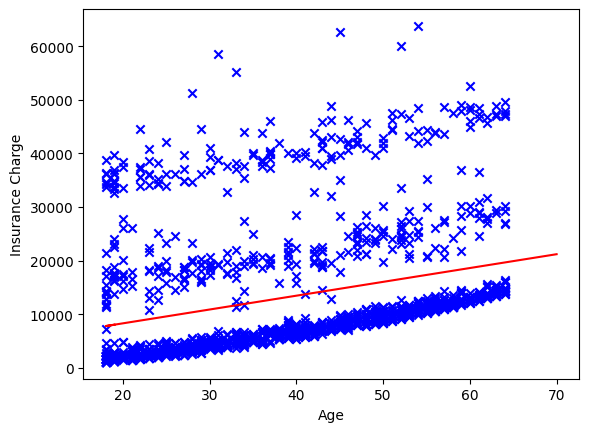

In [90]:
# What is the predicted insurance charges of a person of 70?

unk_x_2 = [[70]]
answer_2 = insurance_model.predict(unk_x_2).round(2)
print(f"A 70-year old would have a predicted insurance charge of {answer_2} units")

# Appending x = 70 to the dataset
x_pred_70 = np.append(x, unk_x_2).reshape(-1, 1)
y_pred_70 = insurance_model.predict(x_pred_70)

plt.scatter(x, y, color = "blue", marker = "x")
plt.plot(x_pred_70, y_pred_70, color = "r")
plt.xlabel("Age")
plt.ylabel("Insurance Charge")
plt.show()